# Function ramp

## Synopse
Creates a 1D/2D/3D gray scale image with dimensions given by s, with n increasing gray scale bands with values varying from the specified range

- **g = ramp(s, n, range) **

    - **g**: Image.
    - **s**: [S H W]: slices, height and width output image dimensions.
    - **n**: [nz ny nx]: number of bands.
    - **range**: [kz_min, kz_max,ky_min,ky_max,kx_min,kx_max], minimum and maximum gray scale values on z,y and x dimension.

In [8]:
import numpy as np

def ramp(s, n, range=[0,255]):
    aux = np.array(n)
    s_orig = s

    if len(aux.shape) == 0:
        s = [1,s[0],s[1]]
        n = [0,0,n]
        range = [0,0,0,0,range[0],range[1]]

    slices,rows, cols = s[0], s[1], s[2]
    z,y,x = np.indices((slices,rows,cols))
    gz = z*n[0]//slices * (range[1]-range[0]) // (n[0]-1) + range[0]
    gy = y*n[1]//rows   * (range[3]-range[2]) // (n[1]-1) + range[2]
    gx = x*n[2]//cols   * (range[5]-range[4]) // (n[2]-1) + range[4]

    return (gz+gy+gx).reshape(s_orig)

## Description
Create an 1, 2 or 3-dimensional image with increasing gray value bands. The function receives the output dimension, the number of increasing bands, and the range of values variation in each direction.

## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python ramp.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia


[NbConvertApp] Converting notebook ramp.ipynb to python
[NbConvertApp] Writing 3426 bytes to ramp.py


### Numeric example

In [3]:
if testing:
    F = ia.ramp([5,7], 3, [4,10])
    print(F)
    F = ia.ramp((1,5,7),(0,3,0), [0,0,4,10,0,0])
    print(F)
    F = ia.ramp([1,5,7],[3,0,0], [4,10,0,0,0,0])
    print(F)

[[ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]]
[[[ 4  4  4  4  4  4  4]
  [ 4  4  4  4  4  4  4]
  [ 7  7  7  7  7  7  7]
  [ 7  7  7  7  7  7  7]
  [10 10 10 10 10 10 10]]]
[[[4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]]]


- **Image example**

""
""

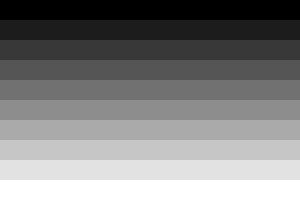

In [4]:
if testing:
    F = ia.ramp([1,200,300], [0,10,0], [0,0,0,255,0,128])
    ia.adshow(ia.normalize(F.reshape(200,300)))

""
""

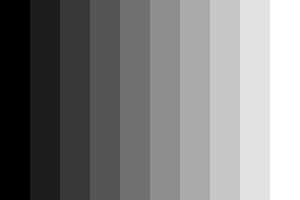

In [6]:
if testing:
    F = ia.ramp([200,300], 10, [0,255])
    ia.adshow(ia.normalize(F))

""
""

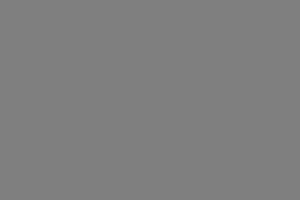

In [7]:
if testing:
    F = ia.ramp([1,200,300], [10,0,0], [0,255,0,0,0,0])
    ia.adshow(ia.normalize(F.reshape(200,300)))

### Image example - 3D

""
""

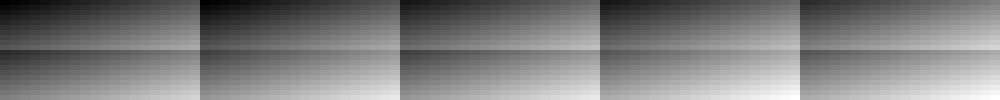

In [8]:
if testing:
    F = ia.ramp([10,50,200], [5,10,20], [0,255,0,255,0,255])
    ia.adshow(ia.normalize(ia.mosaic(F,5)))

""
""

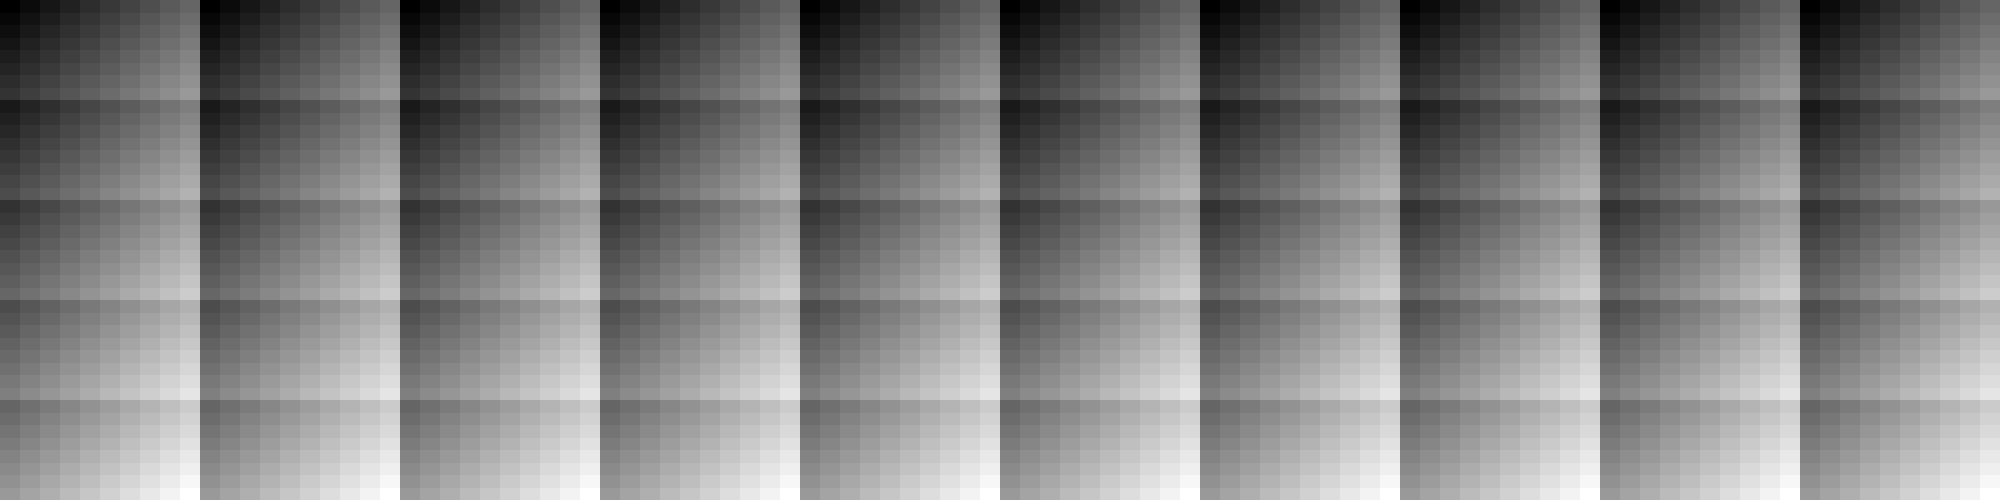

In [9]:
if testing:
    F = ia.ramp([50,100,200], [5,8,10], [0,255,120,250,0,255])
    ia.adshow(ia.normalize(ia.mosaic(F,10)))

""
""

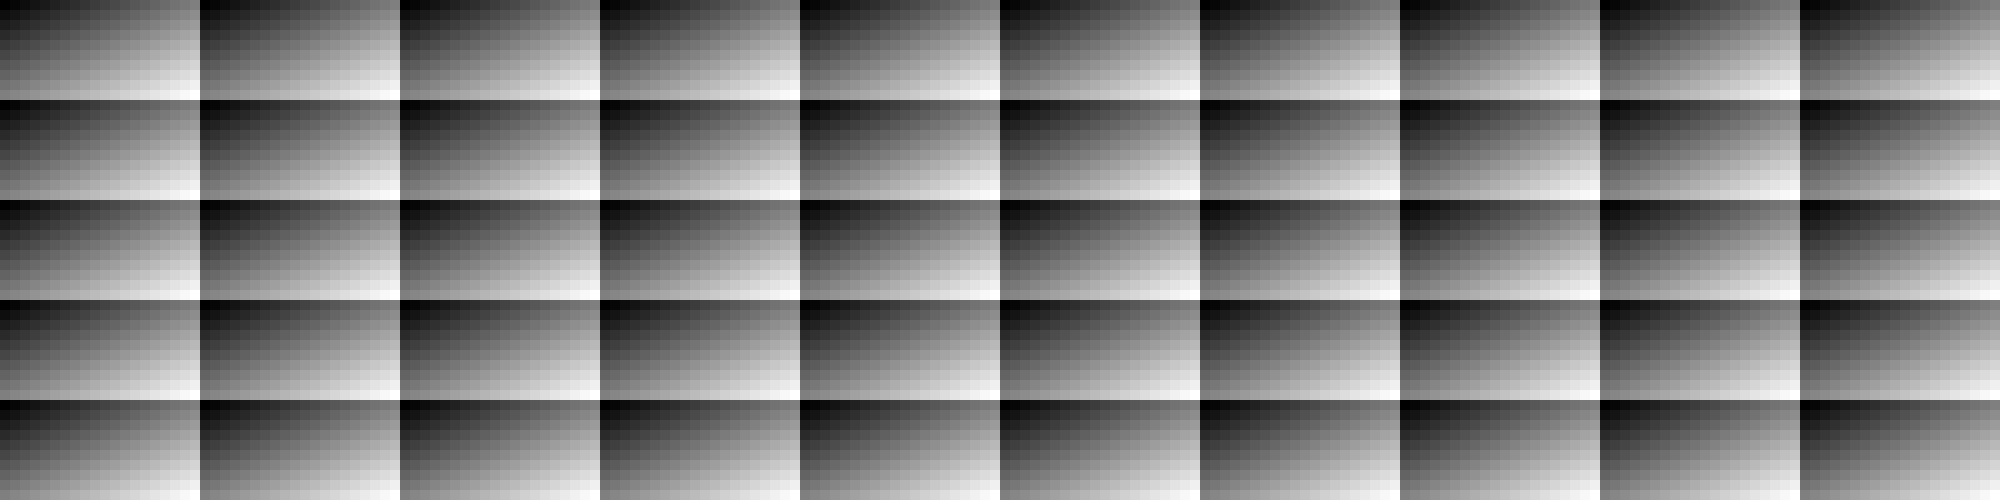

In [10]:
if testing:
    F = ia.ramp([50,100,200], [0,10,20], [0,0,0,255,0,255])
    ia.adshow(ia.normalize(ia.mosaic(F,10)))

### Image example 2 - 3D

In [11]:
if testing:
    F = ia.ramp([10,20,30], [10,20,30], [0,255,0,255,0,255])
    ia.adshow(ia.normalize(ia.mosaic(F, 10)))

""
""


In [12]:
if testing:
    F = ia.ramp([10,20,30], [5,5,5], [0,255,0,255,0,255])
    ia.adshow(ia.normalize(ia.mosaic(F, 10)))

""
""


In [13]:
if testing:
    F = ia.ramp([10,20,30], [2,3,4], [0,255,0,255,0,255])
    ia.adshow(ia.normalize(ia.mosaic(F, 10)))

""
""


## Equation

$$ g(z,y,x) =  \lfloor \lfloor \frac{n_z}{S} z \rfloor \frac{kz_{max}-kz_{min}}{n_z-1} \rfloor + kz_{min} +\lfloor \lfloor \frac{n_y}{H} y \rfloor \frac{ky_{max}-ky_{min}}{n_y-1} \rfloor + ky_{min} + \lfloor \lfloor \frac{n_x}{W} x \rfloor \frac{kx_{max}-kx_{min}}{n_x-1} \rfloor + kx_{min} $$


## Contributions

Mariana Pinheiro, 1st semester 2011

Lucas de Vasconcellos Teixeira, 1st semester 2017